In [12]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [60]:
datadir = '/home/pdcg/Documents/post_process_routines/'
simulation = 'iso_aur_short_10hi/'
s = h5py.File(datadir+simulation+'snapdir_004/snapshot_004.0.hdf5', 'r')

In [61]:
data = np.loadtxt(datadir+simulation+'oneclustershocks.txt')

In [62]:
time = s['Header'].attrs['Time']
unit_time = s['Header'].attrs['UnitLength_in_cm']/s['Header'].attrs['UnitVelocity_in_cm_per_s']
unit_mass = s['Header'].attrs['UnitMass_in_g']
gyr = 3.15569e16
solarmass = 1.989e33

In [63]:
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:5]
full_tensor = data[:,5:11]
integrating_flag = data[:,11:17]
tidal_heating = data[:,17]

In [64]:
time_gyr = time*unit_time/gyr
tensor_eigenvalues *= (gyr/unit_time)**2
full_tensor *= (gyr/unit_time)**2
init_mass = init_mass*unit_mass/solarmass
tidal_heating *= gyr**2

In [65]:
unique, counts = np.unique(init_mass, return_counts=True)
idx = np.argsort(counts)

In [66]:
mass = unique[idx[-1]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
tensor_eigenvalues_unique = tensor_eigenvalues[mask]
full_tensor_unique = full_tensor[mask]
integrating_flag_unique = integrating_flag[mask]
tidal_heating_unique = tidal_heating[mask]

[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None,
 (-1000000.0, -10000.0)]

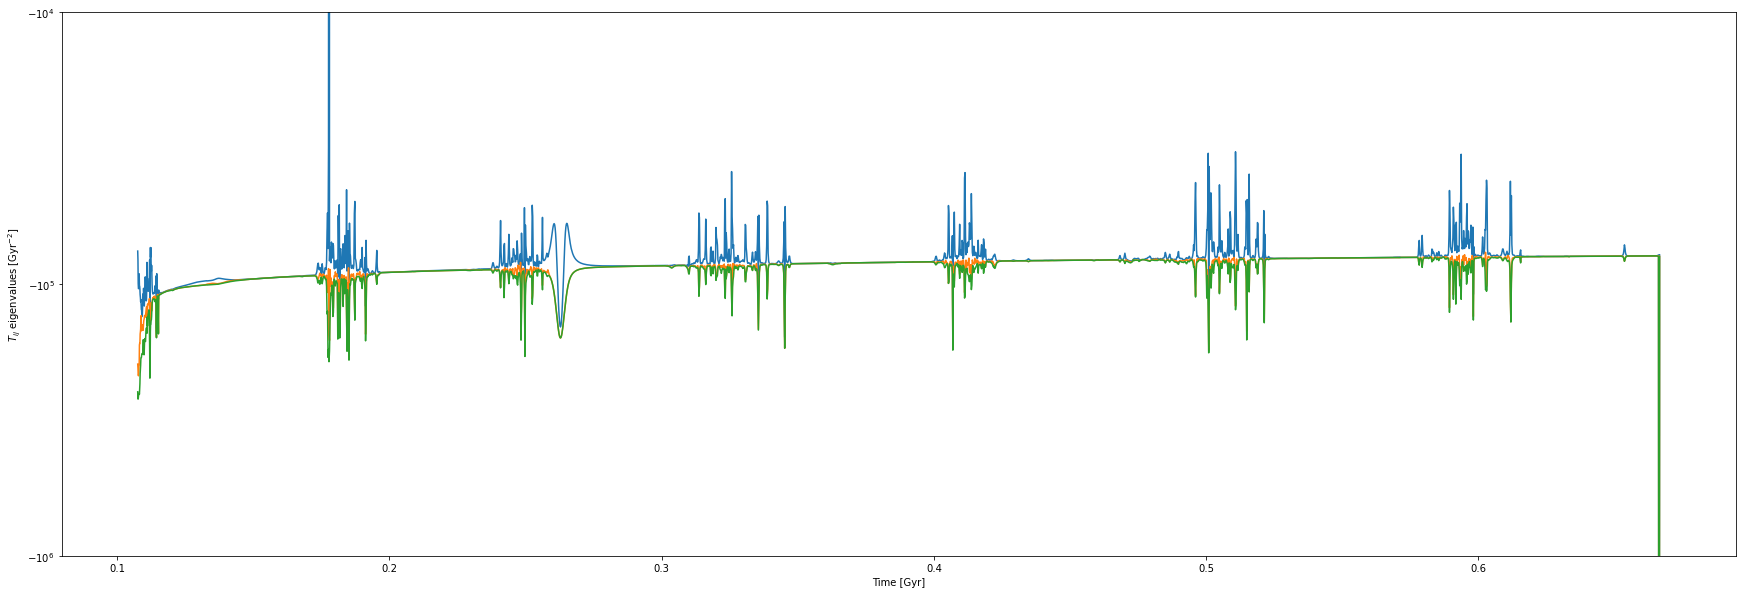

In [58]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_eigenvalues_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_eigenvalues_unique[:,i][np.argsort(time_gyr_unique)])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog',ylim=(-1e6,-1e4))#, xlim=(0.5, 0.6))

[Text(0.5, 0, 'Time [Gyr]'),
 Text(0, 0.5, '$T_{ij}$ eigenvalues [Gyr$^{-2}$]'),
 None,
 (-1000000.0, -10000.0)]

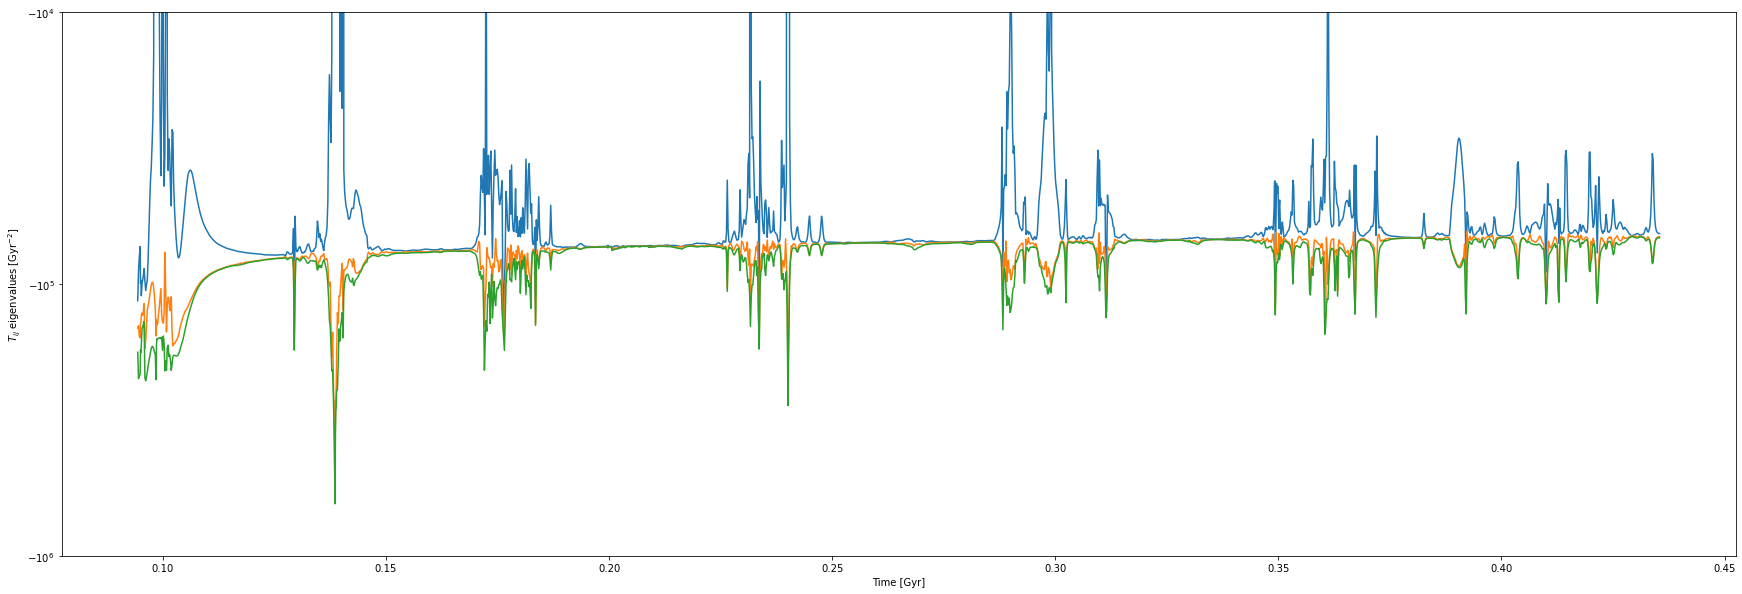

In [67]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
for i in range(tensor_eigenvalues_unique.shape[1]):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_eigenvalues_unique[:,i][np.argsort(time_gyr_unique)])
ax.set(xlabel='Time [Gyr]', ylabel=r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', yscale='symlog', ylim=(-1e6,-1e4))

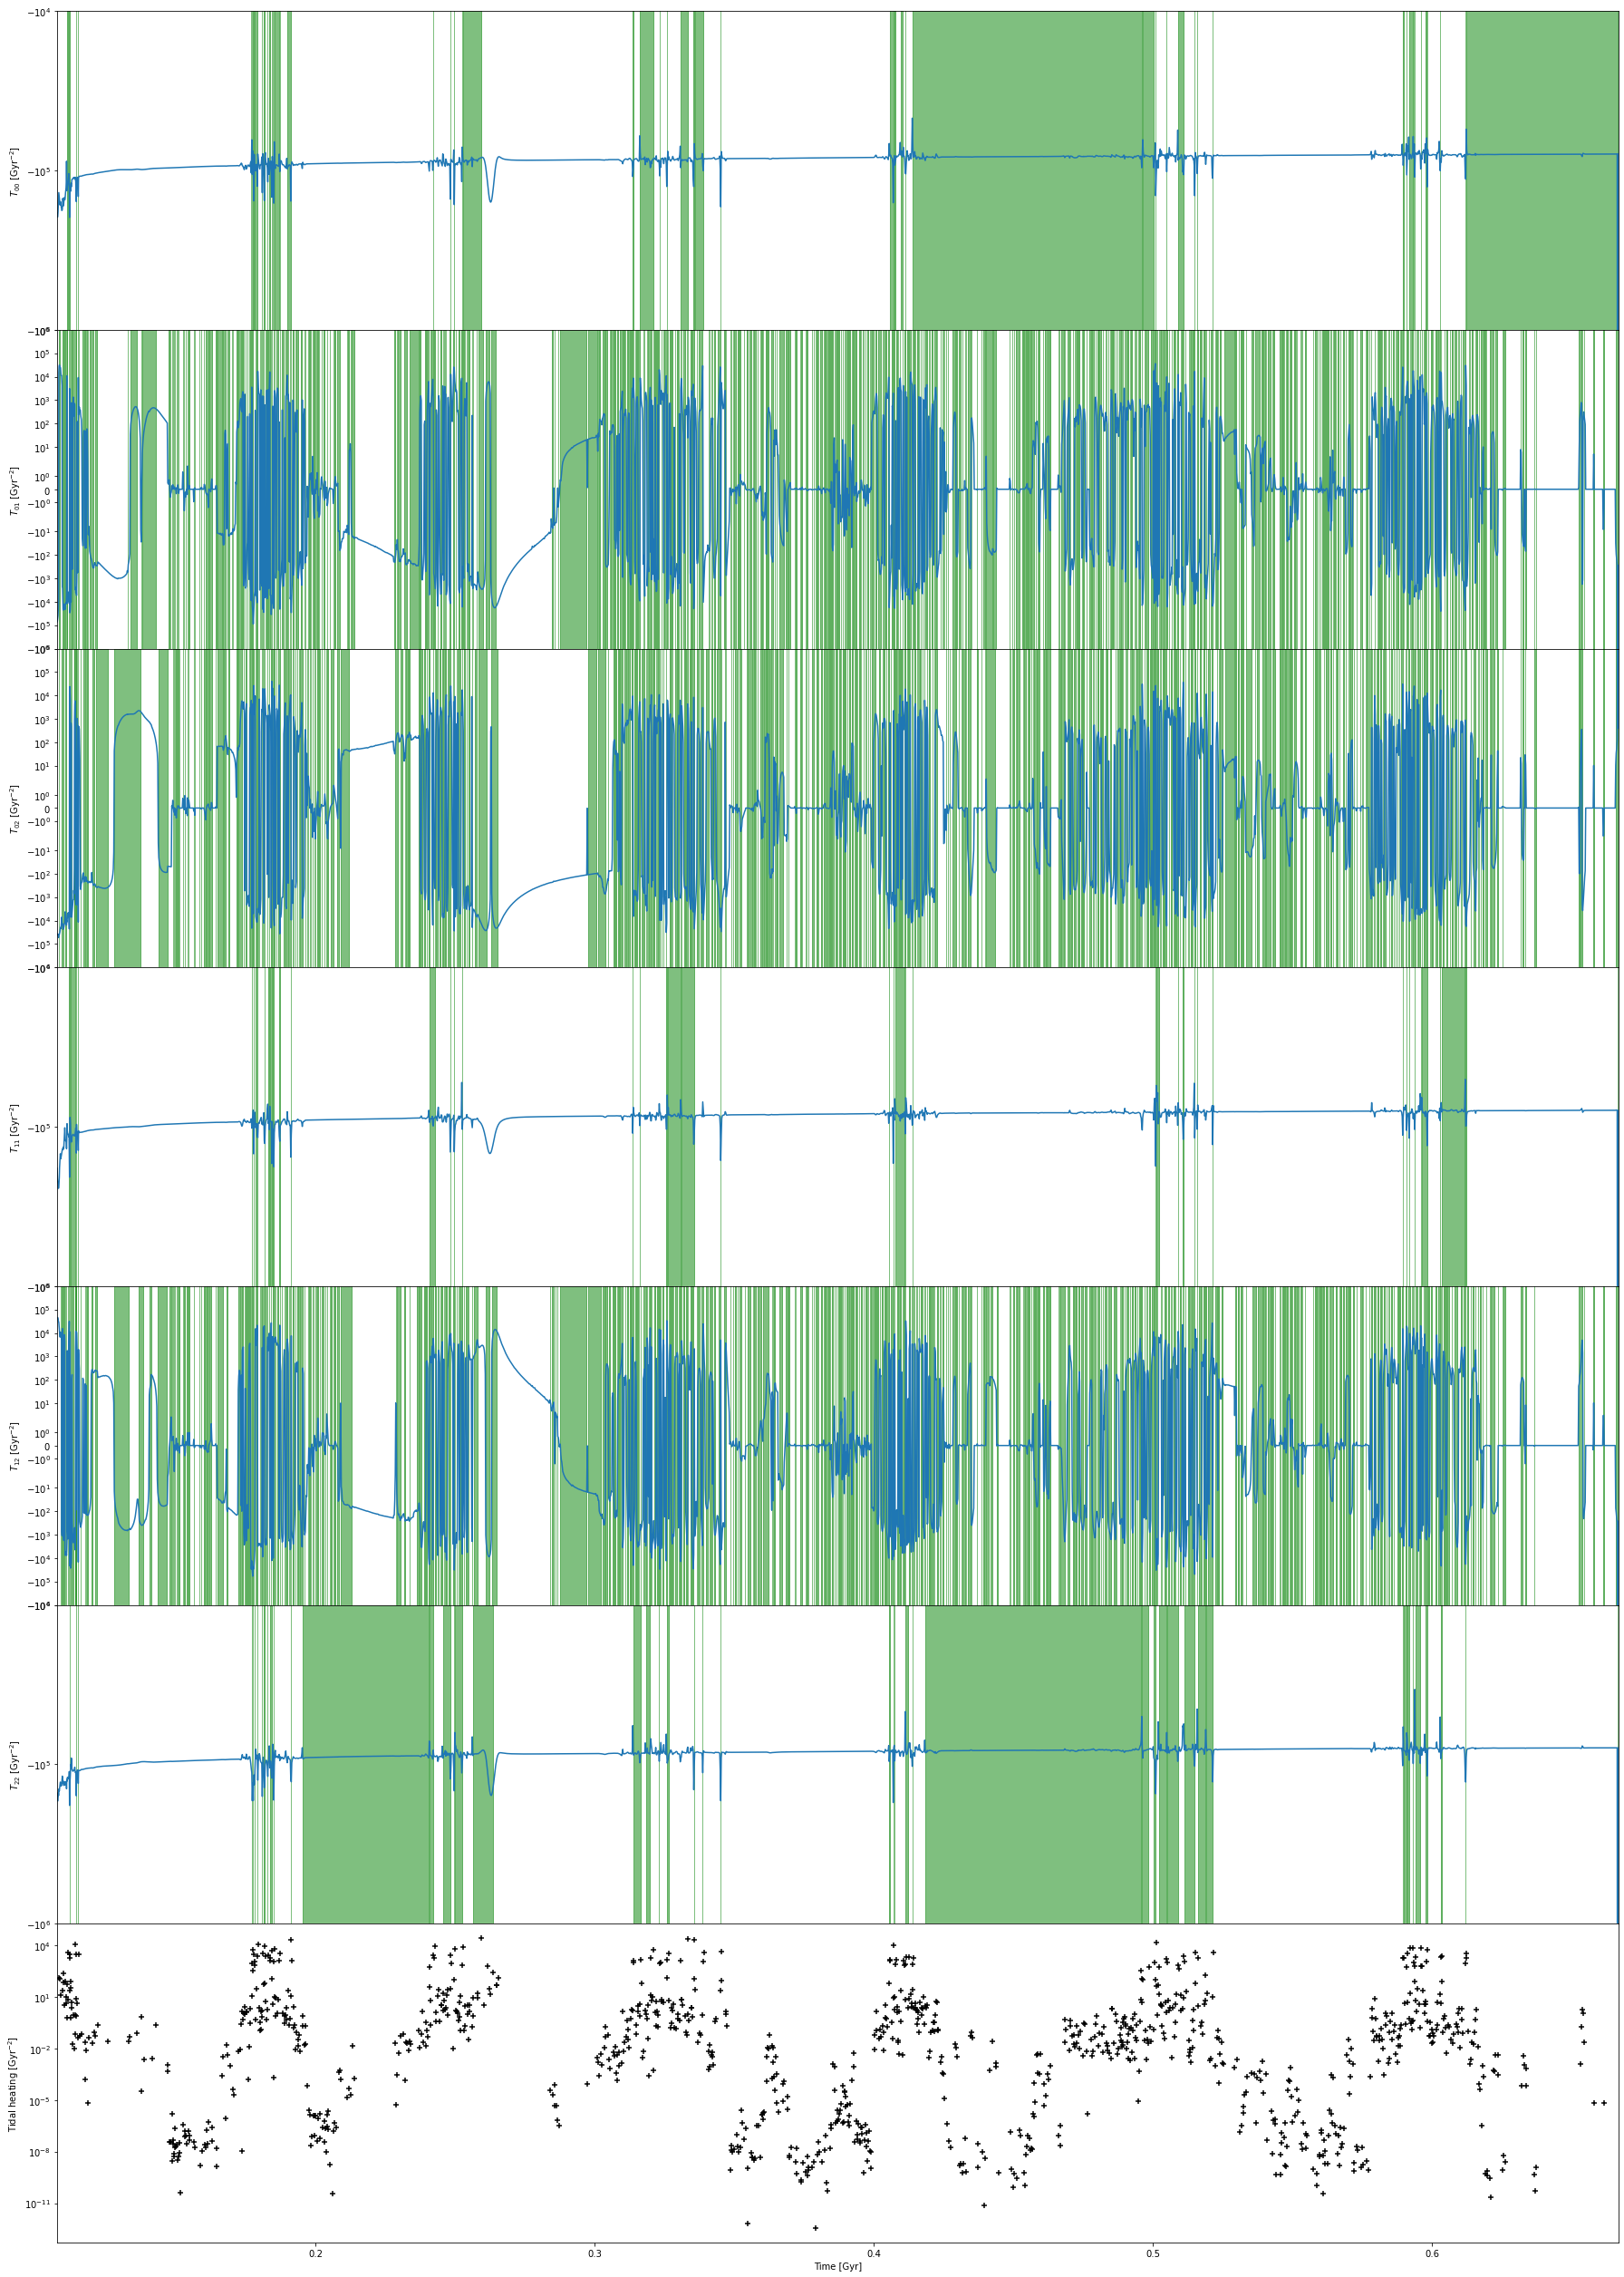

In [59]:
fig, ax = plt.subplots(7, 1, sharex=True, figsize=(25, 35))

i=0
mass = unique[idx[-1-i]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
full_tensor_unique = full_tensor[mask]
integrating_flag_unique = integrating_flag[mask]
ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,0][np.argsort(time_gyr_unique)])
ax[0].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,0]> 0.,
            color='green', alpha=0.5, transform=ax[0].get_xaxis_transform())
ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,1][np.argsort(time_gyr_unique)])
ax[1].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,1]> 0.,
            color='green', alpha=0.5, transform=ax[1].get_xaxis_transform())
ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,2][np.argsort(time_gyr_unique)])
ax[2].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,2]> 0.,
            color='green', alpha=0.5, transform=ax[2].get_xaxis_transform())
ax[3].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,3][np.argsort(time_gyr_unique)])
ax[3].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,3]> 0.,
            color='green', alpha=0.5, transform=ax[3].get_xaxis_transform())
ax[4].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,4][np.argsort(time_gyr_unique)])
ax[4].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,4]> 0.,
            color='green', alpha=0.5, transform=ax[4].get_xaxis_transform())
ax[5].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,5][np.argsort(time_gyr_unique)])
ax[5].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,5]> 0.,
            color='green', alpha=0.5, transform=ax[5].get_xaxis_transform())
ax[6].scatter(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], tidal_heating[mask][np.argsort(time_gyr_unique)][1:], c='black', marker='+')
        
ax[6].set(xlabel='Time [Gyr]', xlim=(time_gyr_unique[np.argsort(time_gyr_unique)].min(), time_gyr_unique[np.argsort(time_gyr_unique)].max()))
ax[0].set(ylabel= r'$T_{00}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,-1e4))
ax[1].set(ylabel= r'$T_{01}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,1e6))
ax[2].set(ylabel= r'$T_{02}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,1e6))
ax[3].set(ylabel= r'$T_{11}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,-1e4))
ax[4].set(ylabel= r'$T_{12}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,1e6))
ax[5].set(ylabel= r'$T_{22}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,-1e4))
ax[6].set(ylabel= r'Tidal heating [Gyr$^{-2}$]',yscale='log')
plt.tight_layout()
plt.subplots_adjust(hspace=0)
# plt.savefig(datadir+simulation+'oneclustershocks.pdf')

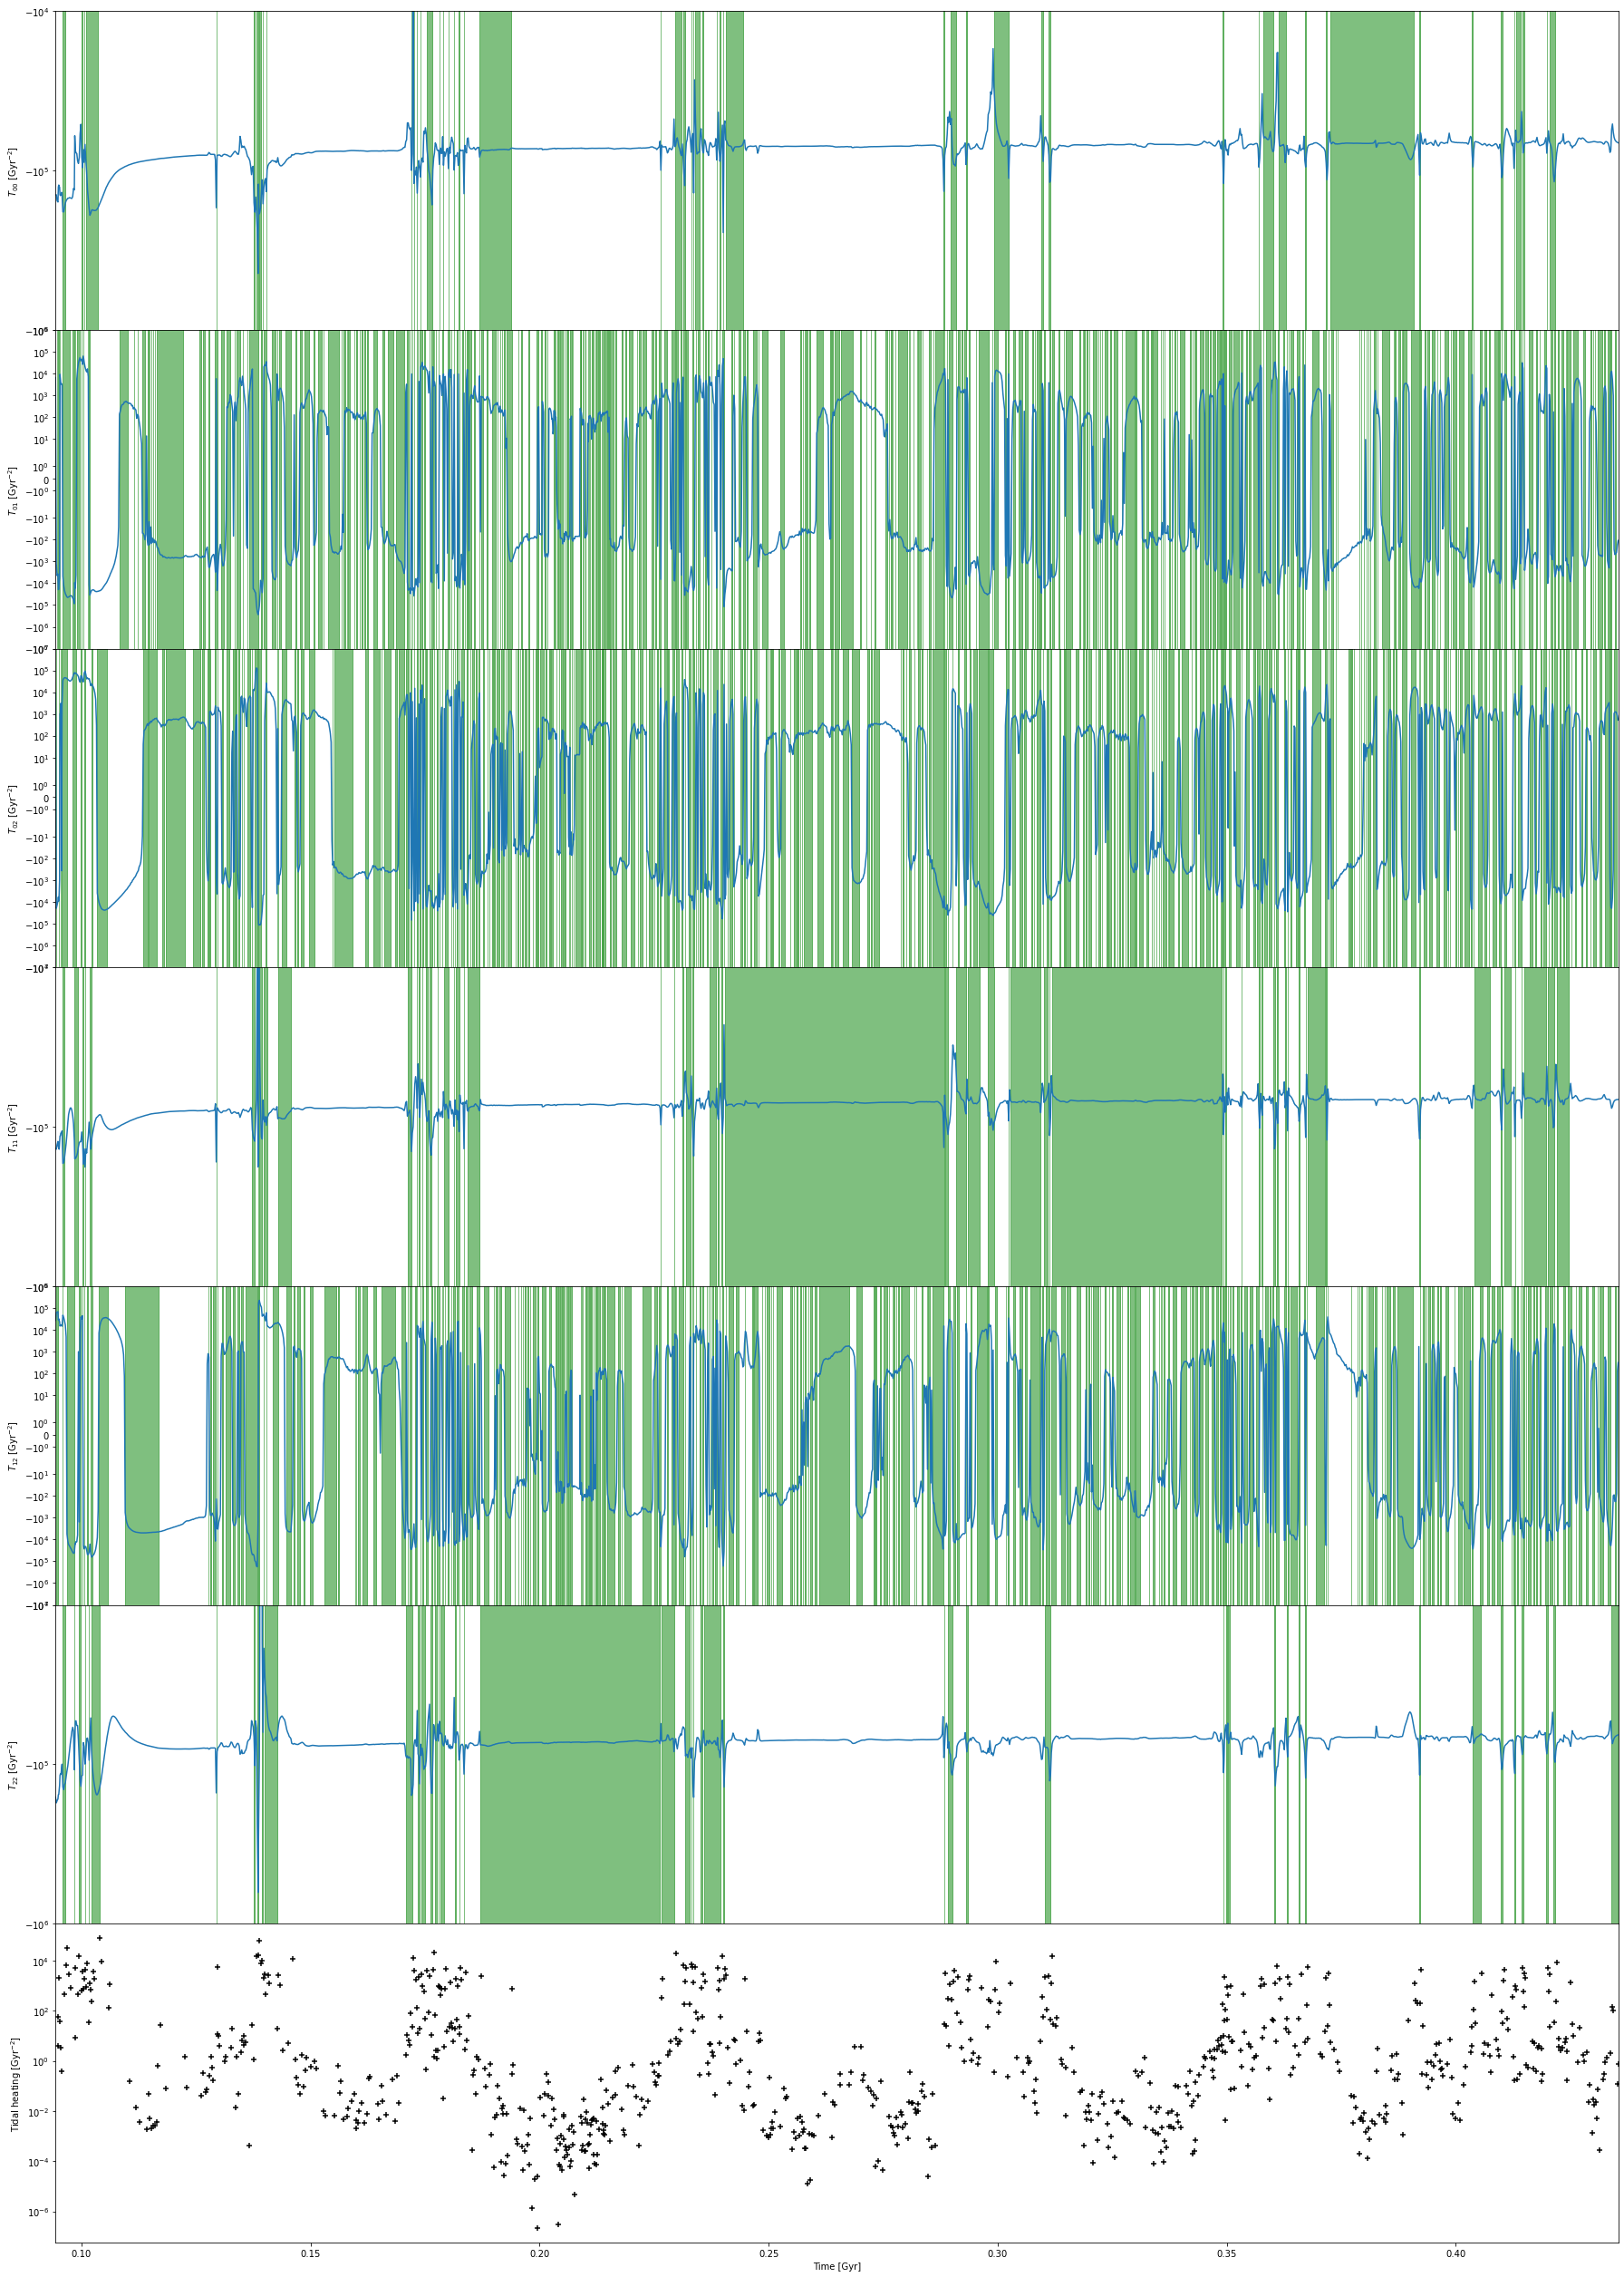

In [68]:
fig, ax = plt.subplots(7, 1, sharex=True, figsize=(25, 35))

i=0
mass = unique[idx[-1-i]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
full_tensor_unique = full_tensor[mask]
integrating_flag_unique = integrating_flag[mask]
ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,0][np.argsort(time_gyr_unique)])
ax[0].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,0]> 0.,
            color='green', alpha=0.5, transform=ax[0].get_xaxis_transform())
ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,1][np.argsort(time_gyr_unique)])
ax[1].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,1]> 0.,
            color='green', alpha=0.5, transform=ax[1].get_xaxis_transform())
ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,2][np.argsort(time_gyr_unique)])
ax[2].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,2]> 0.,
            color='green', alpha=0.5, transform=ax[2].get_xaxis_transform())
ax[3].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,3][np.argsort(time_gyr_unique)])
ax[3].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,3]> 0.,
            color='green', alpha=0.5, transform=ax[3].get_xaxis_transform())
ax[4].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,4][np.argsort(time_gyr_unique)])
ax[4].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,4]> 0.,
            color='green', alpha=0.5, transform=ax[4].get_xaxis_transform())
ax[5].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,5][np.argsort(time_gyr_unique)])
ax[5].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,5]> 0.,
            color='green', alpha=0.5, transform=ax[5].get_xaxis_transform())
ax[6].scatter(time_gyr_unique[np.argsort(time_gyr_unique)], tidal_heating[mask][np.argsort(time_gyr_unique)], c='black', marker='+')
        
ax[6].set(xlabel='Time [Gyr]', xlim=(time_gyr_unique[np.argsort(time_gyr_unique)].min(), time_gyr_unique[np.argsort(time_gyr_unique)].max()))
ax[0].set(ylabel= r'$T_{00}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,-1e4))
ax[1].set(ylabel= r'$T_{01}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e7,1e6))
ax[2].set(ylabel= r'$T_{02}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e7,1e6))
ax[3].set(ylabel= r'$T_{11}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,-1e4))
ax[4].set(ylabel= r'$T_{12}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e7,1e6))
ax[5].set(ylabel= r'$T_{22}$ [Gyr$^{-2}$]',yscale='symlog', ylim=(-1e6,-1e4))
ax[6].set(ylabel= r'Tidal heating [Gyr$^{-2}$]',yscale='log')
plt.tight_layout()
plt.subplots_adjust(hspace=0)
# plt.savefig(datadir+simulation+'oneclustershocks.pdf')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pynbody

# Load simulation data
simulation = 'lvl5_short_5hi_pm'
s = pynbody.load(simulation+'/snapdir_092/snapshot_092')

# Load shock evolution data
data = np.loadtxt(simulation+'/oneclustershocks.txt', usecols=(0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18))

# Extract data
time = data[:,0]
init_mass = data[:,1]
tensor_eigenvalues = data[:,2:5]
full_tensor = data[:,5:11]
integrating_flag = data[:,11:17]
tidal_heating = data[:,17]

# Convert time column to Gyr
time_gyr = pynbody.analysis.cosmology.age(s,z = 1./time - 1.)

# Convert tensor data to Gyr^-2
gyr = 3.15576e16 # in s
unit_time = s.properties['UnitLength_in_cm']/s.properties['UnitVelocity_in_cm_per_s']
h = s.properties['h']
convert_factor = h**2/time**3 * (gyr/unit_time)**2 # to Gyr^-2

tensor_eigenvalues *= convert_factor[:, np.newaxis]
full_tensor *= convert_factor[:, np.newaxis]
tidal_heating *= gyr**2

/home/pdcg/.local/lib/python3.10/site-packages/pynbody/snapshot/gadgethdf.py:403: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


ValueError: invalid column index 18 at row 1 with 18 columns

In [3]:
unique, counts = np.unique(init_mass, return_counts=True)
idx = np.argsort(counts)
mass = unique[idx[-1]]
mask = init_mass == mass
time_gyr_unique = time_gyr[mask]
tensor_eigenvalues_unique = tensor_eigenvalues[mask]

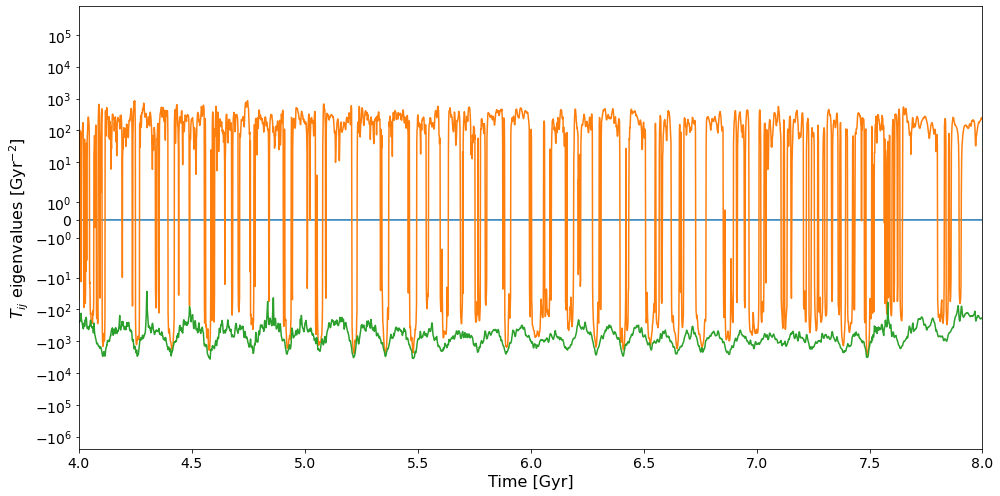

In [4]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
for i in range(3):
  ax.plot(time_gyr_unique[np.argsort(time_gyr_unique)], tensor_eigenvalues_unique[np.argsort(time_gyr_unique), i])
ax.set_xlabel('Time [Gyr]', fontsize=16)
ax.set_ylabel(r'$T_{ij}$ eigenvalues [Gyr$^{-2}$]', fontsize=16)
ax.set_yscale('symlog')
ax.set(xlim=(4,8))#, ylim=(-1e5, 1e4))
ax.tick_params(axis='both', which='both', labelsize=14)
plt.tight_layout()
# plt.savefig('shock_evolutions.png')

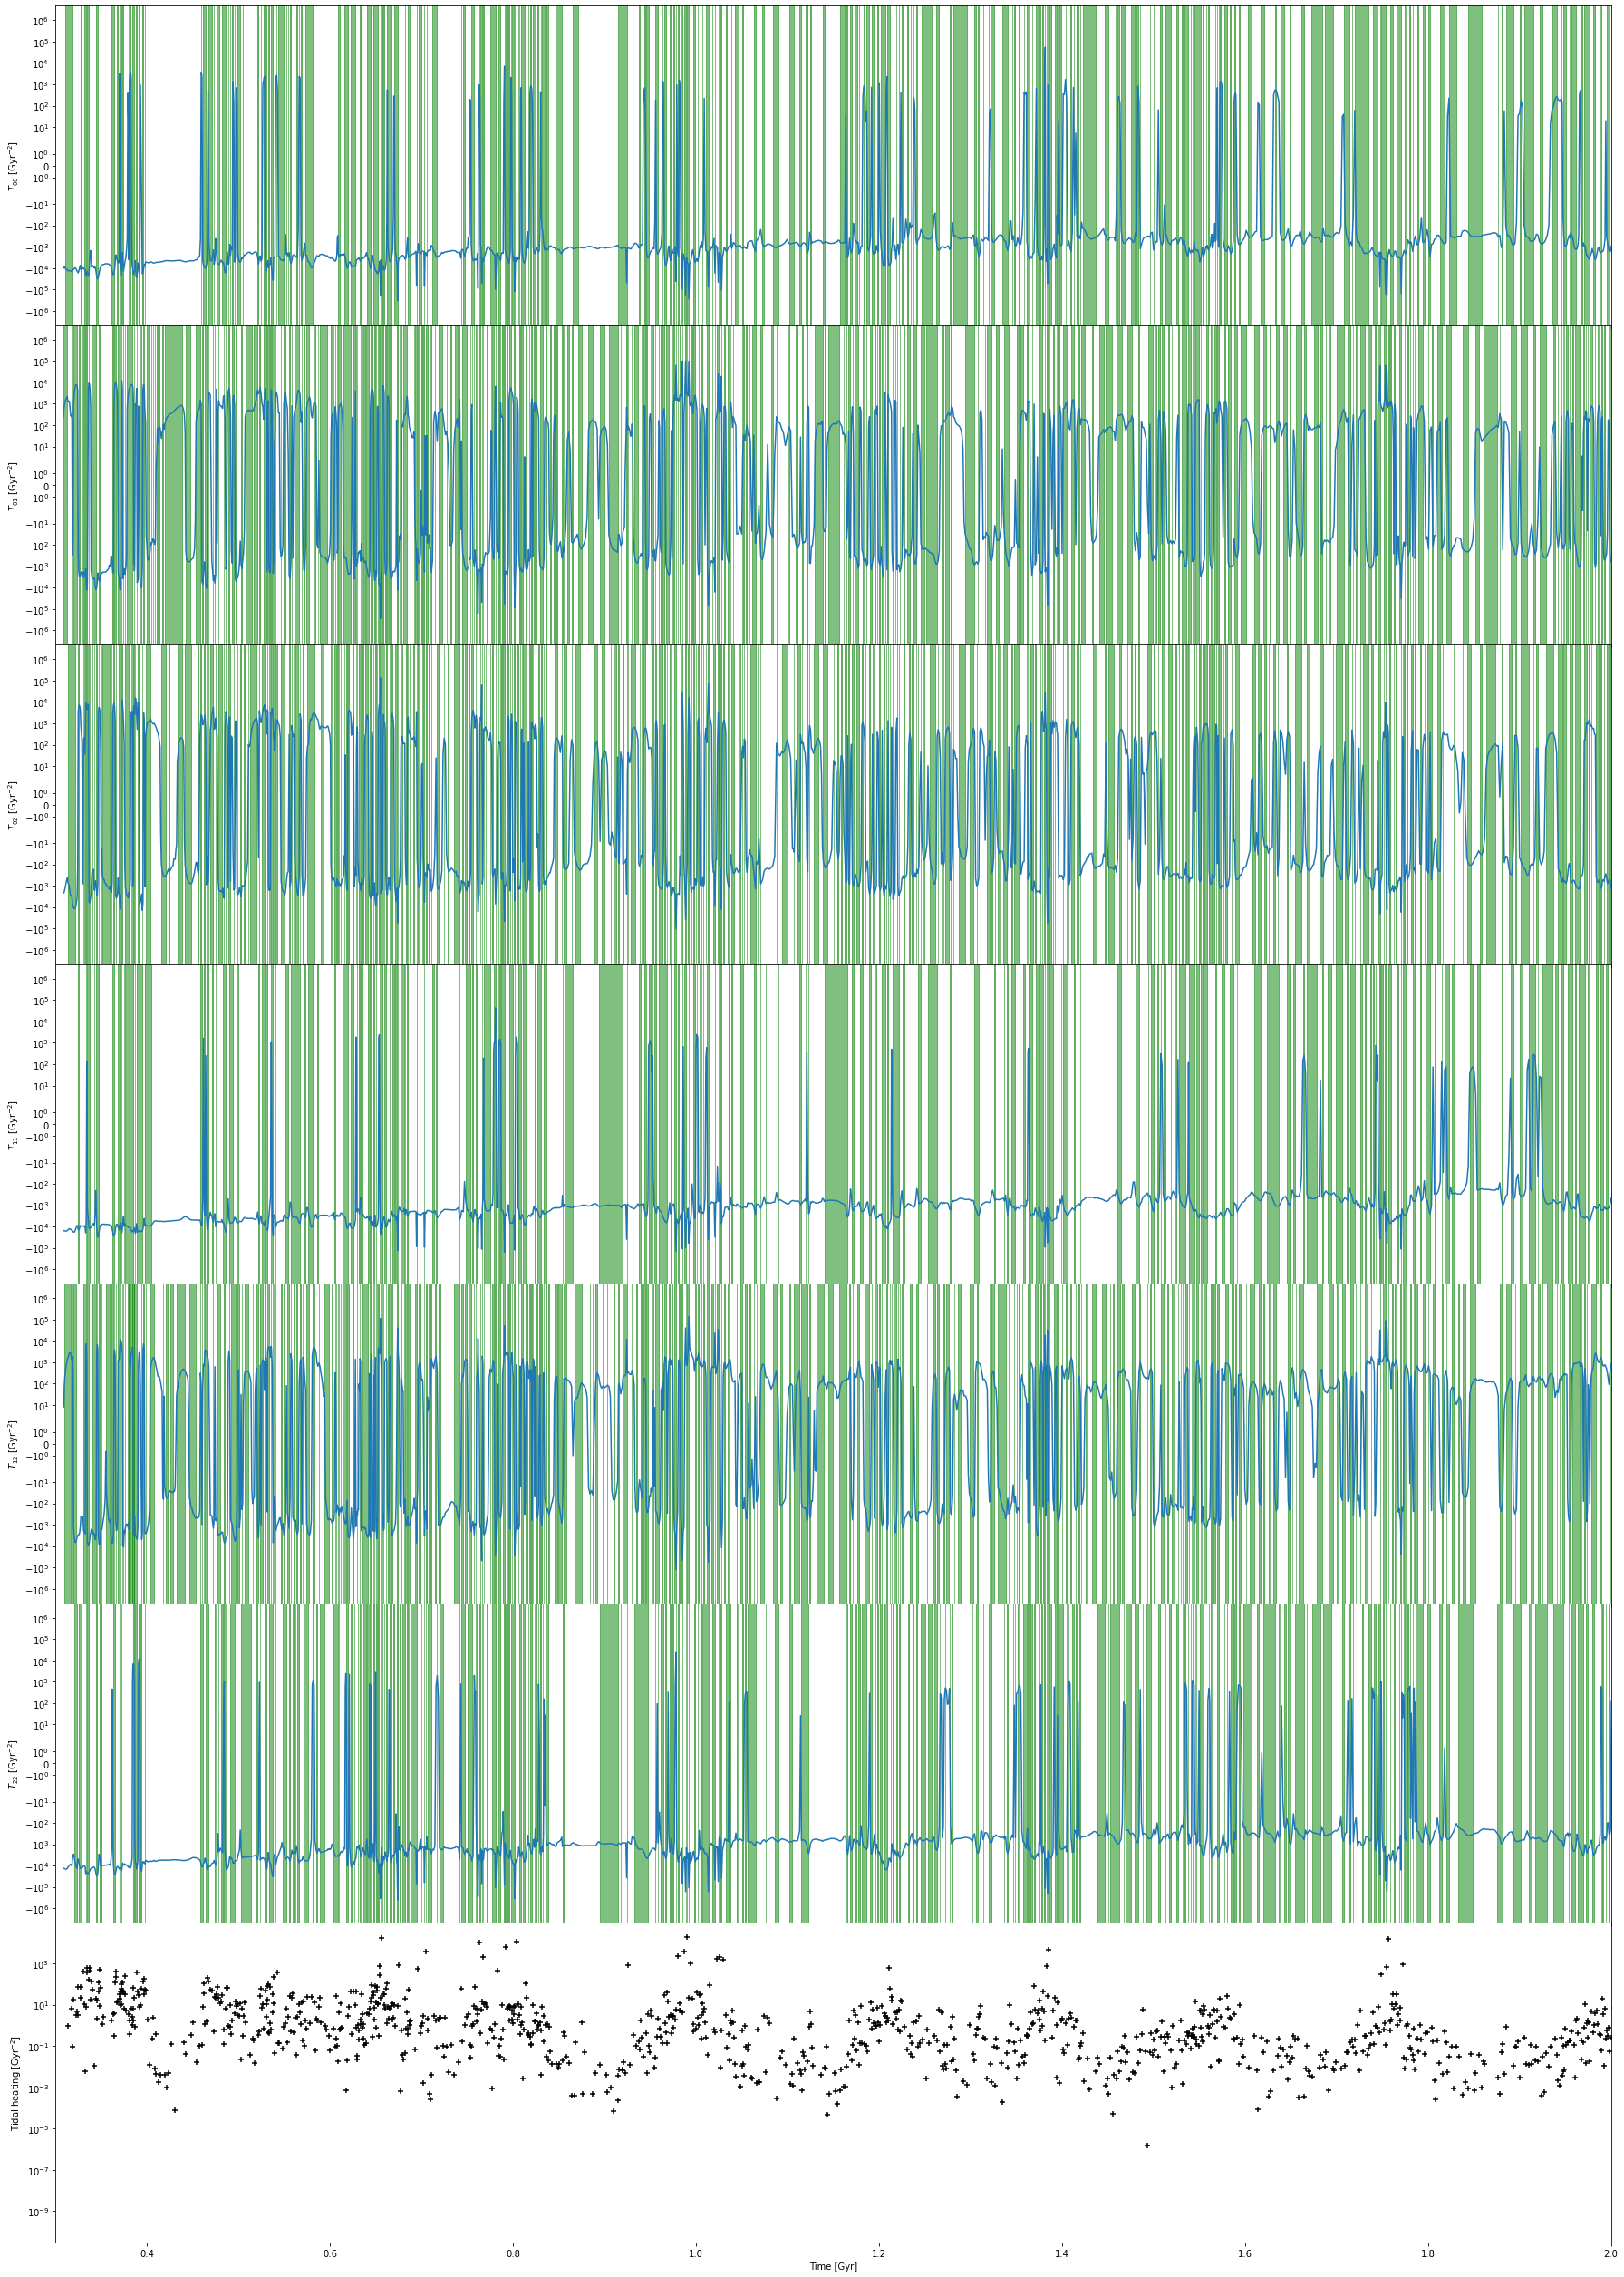

In [11]:
fig, ax = plt.subplots(7, 1, sharex=True, figsize=(25, 35))
for i in range(1):
    mass = unique[idx[-1-i]]
    mask = init_mass == mass
    time_gyr_unique = time_gyr[mask]
    full_tensor_unique = full_tensor[mask]
    integrating_flag_unique = integrating_flag[mask]
    ax[0].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,0][np.argsort(time_gyr_unique)])
    ax[0].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,0]> 0.,
                color='green', alpha=0.5, transform=ax[0].get_xaxis_transform())
    ax[1].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,1][np.argsort(time_gyr_unique)])
    ax[1].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,1]> 0.,
                color='green', alpha=0.5, transform=ax[1].get_xaxis_transform())
    ax[2].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,2][np.argsort(time_gyr_unique)])
    ax[2].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,2]> 0.,
                color='green', alpha=0.5, transform=ax[2].get_xaxis_transform())
    ax[3].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,3][np.argsort(time_gyr_unique)])
    ax[3].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,3]> 0.,
                color='green', alpha=0.5, transform=ax[3].get_xaxis_transform())
    ax[4].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,4][np.argsort(time_gyr_unique)])
    ax[4].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,4]> 0.,
                color='green', alpha=0.5, transform=ax[4].get_xaxis_transform())
    ax[5].plot(time_gyr_unique[np.argsort(time_gyr_unique)], full_tensor_unique[:,5][np.argsort(time_gyr_unique)])
    ax[5].fill_between(time_gyr_unique[np.argsort(time_gyr_unique)][:-1], -1e6, 1e6, where= integrating_flag_unique[1:,5]> 0.,
                color='green', alpha=0.5, transform=ax[5].get_xaxis_transform())
    ax[6].scatter(time_gyr_unique[np.argsort(time_gyr_unique)], tidal_heating[mask][np.argsort(time_gyr_unique)], c='black', marker='+')
        
# ax[6].set(xlabel='Time [Gyr]', xlim=(time_gyr_unique[np.argsort(time_gyr_unique)].min(), time_gyr_unique[np.argsort(time_gyr_unique)].max()))
ax[6].set(xlabel='Time [Gyr]', xlim=(0.3, 2))
ax[0].set(ylabel= r'$T_{00}$ [Gyr$^{-2}$]',yscale='symlog')#, ylim=(-1e7,-1e5))
ax[1].set(ylabel= r'$T_{01}$ [Gyr$^{-2}$]',yscale='symlog')#, ylim=(-1e7,1e6))
ax[2].set(ylabel= r'$T_{02}$ [Gyr$^{-2}$]',yscale='symlog')#, ylim=(-1e7,1e6))
ax[3].set(ylabel= r'$T_{11}$ [Gyr$^{-2}$]',yscale='symlog')#, ylim=(-1e7,-1e5))
ax[4].set(ylabel= r'$T_{12}$ [Gyr$^{-2}$]',yscale='symlog')#, ylim=(-1e7,1e6))
ax[5].set(ylabel= r'$T_{22}$ [Gyr$^{-2}$]',yscale='symlog')#, ylim=(-1e7,-1e5))
ax[6].set(ylabel= r'Tidal heating [Gyr$^{-2}$]',yscale='log')
plt.tight_layout()
plt.subplots_adjust(hspace=0)
# plt.savefig(datadir+simulation+'oneclustershocks.pdf')